In [1]:
from distributed import Client, progress
from distributed.client import futures_of
import hdfs3
import dask.dataframe

c = Client('localhost:8786')
c

Client Scheduler: tcp://localhost:8786 Dashboard: http://localhost:8787,Cluster Workers: 23 Cores: 936 Memory: 3144.83 GB


In [2]:
hdfs = hdfs3.HDFileSystem('navet', port=8020)
filenames = hdfs.glob('/sosweet-text/undir_weighted_mention_network_thresh_5/*')
filenames

['/sosweet-text/undir_weighted_mention_network_thresh_5/2016-02-pipe-user_timestamp_body-csv-pipe-filter_users']

In [3]:
df = dask.dataframe.read_csv('hdfs://navet:8020' + filenames[0],
                             names=['user_id', 'timestamp', 'body'],
                             parse_dates=['timestamp'])

In [4]:
df = df.persist()
progress(df)

A Jupyter Widget

In [5]:
df.head()

,user_id,timestamp,body
0,624590762,2016-02-02 09:28:43,Si j'ai 10 en histoire je sors grosse bouteill...
1,1257818401,2016-02-02 09:28:46,J'ai cette peur en tête h24... C'est terrible ...
2,820483044,2016-02-02 09:28:47,@Claroulala c'est vrai t'es rousse toi j'avais...
3,2522353878,2016-02-02 09:28:50,APPLES
4,1267867782,2016-02-02 09:28:54,"@Nordengail Alors qu'un bon vieux ""TAGONARD!""..."


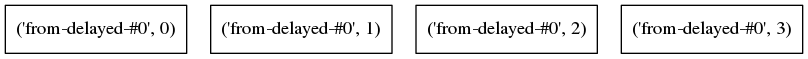

In [16]:
js.visualize()

In [3]:
#def load_sosweet_datafile(filename):
#    actor_ids = []
#    timestamps = []
#    bodies = []
#    with open(filename) as file:
#        for line in file:
#            try:
#                data = ujson.loads(line)
#            except:
#                break
#            actor_ids.append(int(data['actor']['id'][15:]))
#            timestamps.append(datetime.strptime(data['postedTime'], '%Y-%m-%dT%H:%M:%S.%fZ'))
#            bodies.append(data['body'])
#    return pd.DataFrame({'actor_id': actor_ids, 'timestamp': timestamps, 'body': bodies})